# Pendahuluan
Penyakit kardiovaskular (CVD) merupakan penyebab kematian utama di seluruh dunia, mengambil perkiraan 17,9 juta nyawa setiap tahun, yang menyumbang 31% dari total kematian di seluruh dunia. Empat dari 5 kematian akibat CVD disebabkan oleh serangan jantung dan stroke, dan sepertiga dari kematian tersebut terjadi pada usia di bawah 70 tahun. Gagal jantung adalah kejadian umum yang disebabkan oleh CVD, dan dataset ini berisi 11 fitur yang dapat digunakan untuk memprediksi kemungkinan penyakit jantung.

Orang-orang dengan penyakit kardiovaskular atau yang berisiko tinggi terhadap penyakit kardiovaskular (karena adanya satu atau lebih faktor risiko seperti hipertensi, diabetes, hiperlipidemia, atau penyakit yang sudah ada) memerlukan deteksi dan pengelolaan dini di mana model pembelajaran mesin dapat sangat membantu.

# Deskripsi
1. Age: usia pasien [tahun]
2. Sex: jenis kelamin pasien [M: Laki-laki, F: Perempuan]
3. Cp:  jenis nyeri dada
Value 0: typical angina
Value 1: atypical angina
Value 2: non-anginal pain
Value 3: asymptomatic
4. trtbps	: tekanan darah istirahat [mm Hg]
5. chol: kolesterol [mm/dl]
6. fbs :gula darah puasa [1: jika Gula Darah Puasa > 120 mg/dl, 0: jika tidak]
7. restecg : hasil elektrokardiografi istirahat [0 : Normal, 1: memiliki abnormalitas gelombang ST-T (inversi gelombang T dan/atau elevasi atau depresi ST sebesar > 0,05 mV), 2: menunjukkan hipertrofi ventrikel kiri yang mungkin atau pasti berdasarkan kriteria Estes']
8. thalachh:detak jantung maksimal yang dicapai [Nilai numerik antara 60 dan 202]
9. exng: angina yang dipicu oleh olahraga [Y: Ya, N: Tidak]
10. oldpeak: depresi ST yang diinduksi olahraga = ST [Nilai numerik yang diukur dalam depresi]
11. slp:  kemiringan segmen ST puncak latihan [Up: naik, Flat: datar, Down: turun]
12. caa:jumlah pembuluh darah utama yang berwarna (0-3)
13. thall : thalassemia  [0: normal, 1: carrier deficiency, 2: fixed deficiency, 3: permanent abnormality]
13. output: kelas output [1: penyakit jantung, 0: Normal]

## Loading Libraries

In [ ]:
# the below code is for displaying the output from all lines of python code within a single cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# A fundamental package for linear algebra and multidimensional arrays
import pandas as pd

# Data analysis and data manipulating tool
import numpy as np

# Library to generate random numbers
import random

# Collection is a Python module that implements specialized container datatypes providing
# Counter is a dict subclass for counting hashable objects
from collections import Counter

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings in the notebook
import warnings
warnings.filterwarnings("ignore")

# to display up to 500 rows in the output of the jupyter notebook cell
pd.set_option('display.max_rows', 500)

### Library for Visualization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

### Library Data Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### Library for Basic Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import time

### Library for Metrics (Computation)

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV

### Library for Boosting Algorithnms

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# DATASET
Heart Attack Analysis & Prediction Dataset

## Import Datasets

In [ ]:
data=pd.read_csv("https://raw.githubusercontent.com/tarawithoutbudimann/datasets-ygy/main/Heart%20Attack%20Analysis%20%26%20Prediction%20Dataset/heart.csv")
data.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [ ]:
data.head(165)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


## Dataset Description

In [ ]:
data.describe()
data.info()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# EXPLORATORY DATA ANALYSIS (EDA)

# Mengapa EDA Penting Untuk Dilakukan?
1. Memahami dataset yang diberikan dan membantu membersihkan dataset tersebut.
2. Memberikan gambaran yang jelas tentang fitur dan hubungan antar variabel(kolerasi).
3. Menjadi pedoman untuk variabel penting agar dipertahankan dan meninggalkan/menghapus variabel-variabel yang tidak penting.
4. Menangani nilai-nilai yang hilang (missing value) atau kesalahan manusia.
5. Mengidentifikasi pencilan (nilai outliers).
6. Melakukan proses EDA (Exploratory Data Analysis) yang bertujuan untuk memaksimalkan wawasan (insight) dari sebuah dataset.
7. Proses yang dilakukan ini membutuhkan waktu yang cukup lama namun sangat efektif dan berperan penting dalam proses pengambilan keputusan maupun memberikan rekomendasi tindakan.

## Matriks Korelasi

Menghapus variabel yang memiliki korelasi kuat satu sama lain penting untuk meningkatkan suatu model. Untuk menemukan korelasi dapat menggunakan fungsi ".corr()" pada pandas dan dapat memvisualisasikan matriks korelasi menggunakan plotly express.

Warna yang lebih terang menunjukkan korelasi positif.
Warna yang lebih gelap menunjukkan korelasi negatif.

In [ ]:
df = pd.DataFrame()

In [ ]:
newdf = data
px.imshow(newdf.corr(),title="Grafik Korelasi Untuk Prediksi Gagal Jantung")

In [ ]:
# Definisikan DataFrame Anda
df = pd.DataFrame(data)  # Ganti ... dengan data Anda
# Hitung matriks korelasi
corr = df.corr()
# Sortir nilai korelasi dan hapus nilai terkorelasi dengan dirinya sendiri
C = abs(corr["output"]).sort_values(ascending=False)[1:]
C

exng        0.436757
cp          0.433798
oldpeak     0.430696
thalachh    0.421741
caa         0.391724
slp         0.345877
thall       0.344029
sex         0.280937
age         0.225439
trtbps      0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: output, dtype: float64

Di sini kita dapat melihat bahwa Penyakit Jantung memiliki korelasi negatif yang tinggi dengan "Detak Jantung Maksimal" (MaxHR) dan korelasi yang sedikit negatif dengan "Kolesterol". Sementara itu, terdapat korelasi positif dengan "Depresi ST" (Oldpeak), "Gula Darah Puasa" (FastingBS), dan "Tekanan Darah Istirahat" (RestingBP). Dari gambar grafik di atas tidak ada kolom yang memiliki korelasi tinggi dengan output. Maksimum korelasi diperoleh untuk "exng" dengan nilai 0.436757 dan korelasi minimum nya 0.028046 untuk "fbs". Korelasi dapat dibilang kuat antar variabel apabila bernilai (-0,8 sd -1 atau 0,8 sd 1)

# MALE VS FEMALE

Kolom 'Sex' digunakan untuk mengklasifikasi pasien dengan kategori 1 dan 0 berdasarkan jenis kelamin mereka. Namun, dalam dataset ini tidak terdapat keterangan jika 1 mewakili laki-laki atau perempuan begitupun dengan 0. Walaupun tetap dapat dilakukan pembuatan model tanpa mengetahui informasi tersebut, akan lebih baik dan lebih optimal jika mengetahuinya.

Dengan melakukan sedikit penelitian, kita dapat menemukan informasi ini^,

Menurut departemen Kesehatan Harvard:
Peneliti menemukan bahwa sepanjang hidup, pria memiliki kemungkinan sekitar dua kali lebih tinggi daripada wanita untuk mengalami serangan jantung. Risiko yang lebih tinggi ini tetap ada bahkan setelah mempertimbangkan faktor risiko tradisional penyakit jantung, termasuk kolesterol tinggi, tekanan darah tinggi, diabetes, indeks massa tubuh, dan aktivitas fisik.

Kita dapat menggunakan informasi ini untuk mengetahui label mana yang mewakili jenis kelamin mana. Ini berarti bahwa jenis kelamin yang memiliki risiko rata-rata yang lebih tinggi untuk mengalami serangan jantung kemungkinan lebih besar untuk menjadi laki-laki. Kita memiliki data untuk menemukan persentase risiko ini, kita hanya perlu menghitungnya seperti di bawah ini.

In [ ]:
fig = px.pie(data, template="plotly_dark",title = "Persebaran Gender", names='sex')
fig.show()

dari piechart di atas dapat diketahui bahwa sebesar 68,3% pasien berasal dari satu jenis kelamin (laki-laki atau perempuan) dan 31,7% sisanya berasal dari gender lainnya.

In [ ]:
#Divide the data based on sex variable
a=data[data["sex"]==1].reset_index()
b=data[data["sex"]==0].reset_index()

In [ ]:
# Menghitung presentase risiko tinggi terkena serangan jantung untuk menemukan label mana yang mewakili jenis kelamin mana.

print("Persentase kategori '1' mengalami serangan jantung = {} %" .format(round((len(a[a["output"]==1])/len(a)*100),2)))
print("Rata-rata usia kategori '1' yang mengalami resiko tinggi = {} yrs\n" .format(round(a[a["output"]==1]["age"].mean())))

print("Persentase kategori '0' mengalami serangan jantung = {} %" .format(round((len(b[b["output"]==1])/len(b)*100),2)))
print("Rata-rata usia kategori '0' yang mengalami resiko tinggi = {} yrs" .format(round(b[b["output"]==1]["age"].mean())))

Persentase kategori '1' mengalami serangan jantung = 44.93 %
Rata-rata usia kategori '1' yang mengalami resiko tinggi = 51 yrs

Persentase kategori '0' mengalami serangan jantung = 75.0 %
Rata-rata usia kategori '0' yang mengalami resiko tinggi = 55 yrs


Ini menunjukkan bahwa untuk jenis kelamin "1", sebesar 44,93% berisiko tinggi mengalami serangan jantung, sedangkan untuk jenis kelamin "0", sebesar 75,0% berisiko (lebih tinggi).

Berdasarkan perhitungan ini dan penelitian oleh para peneliti dari Harvard, kita dapat menyimpulkan bahwa label jenis kelamin "0" dalam dataset ini adalah untuk laki-laki, sedangkan label "1" adalah untuk perempuan, karena label "0" lebih rentan terhadap serangan jantung (75,0%).

In [ ]:
fig=px.histogram(df,
                 x="cp",
                 color="sex",
                 hover_data=df.columns,
                 title="Jenis Nyeri Dada",
                 barmode="group"
                )
fig.show()

diperoleh informasi dari grafik berupa, gender yang dominan terkena serangan jantung akibat nyeri dada adalah laki-laki dengan jenis nyeri dada tertinggi yaitu atypical angina dan yang terendah merupakan jenis nyeri dada Asimtomatik.


**min - max resting blood pressure terhadap kemungkinan serangan jantung**

In [ ]:
mean_by_output = df.groupby('output')['trtbps'].min()
mean_by_output
mean_by_output = df.groupby('output')['trtbps'].max()
mean_by_output

output
0    100
1     94
Name: trtbps, dtype: int64

output
0    200
1    180
Name: trtbps, dtype: int64

dari perhitungan min max di atas dapat diketahui bahwa pasien yang terkena serangan jantung memiliki resting blood pressure antara 94 hingga 180.

**min - max cholesterol terhadap kemungkinan serangan jantung**

In [ ]:
mean_by_output = df.groupby('output')['chol'].min()
mean_by_output

output
0    131
1    126
Name: chol, dtype: int64

In [ ]:
mean_by_output = df.groupby('output')['chol'].max()
mean_by_output

output
0    409
1    564
Name: chol, dtype: int64

dari perhitungan min max di atas dapat diketahui bahwa pasien yang terkena serangan jantung memiliki kadar kolesterol antara 126 hingga 564.

**Pengaruh Gula Darah Puasa Terhadap Kemungkinan Serangan Jantung**

In [ ]:
count = data[(data['fbs'] == 1) & (data['output'] == 1)]['fbs'].count()

# Menampilkan hasil
print("Jumlah pasien yang memiliki gula darah saat puasa lebih dari 120 dan memiliki nilai 1 pada kolom Output:", count)

Jumlah pasien yang memiliki gula darah saat puasa lebih dari 120 dan memiliki nilai 1 pada kolom Output: 23


In [ ]:
fig=px.histogram(df,
                 x="restecg",
                 color = "restecg",
                 hover_data=df.columns,
                 title="Distribusi Elektrokardiogram Istirahat (Resting ECG)")
fig.show()

Dari grafik tersebut dapat dilihat bahwa mayoritas sample memiliki abnormalitas gelombang ST-T (inversi gelombang T dan/atau elevasi atau depresi ST sebesar > 0,05 mV)

**rentang detak jantung maksimal terhadap kemungkinan serangan jantung**

In [ ]:
mean_by_output = df.groupby('output')['thalachh'].min()
mean_by_output

output
0    71
1    96
Name: thalachh, dtype: int64

In [ ]:
mean_by_output = df.groupby('output')['thalachh'].max()
mean_by_output

output
0    195
1    202
Name: thalachh, dtype: int64

dari perhitungan di atas dapat diketahui bahwa pasien yang terkena serangan jantung memiliki detak jantung maksimal yang lebih tinggi antara 96 hingga 202.

**Pengaruh Angina yang diinduksi olahraga terhadap kemungkinan serangan jantung**

In [ ]:
count = data[(data['exng'] == 1) & (data['output'] == 1)]['exng'].count()

# Menampilkan hasil
print("Jumlah pasien yang memiliki Exercise Induced Angina dan kemungkinan serangan jantung : ", count)

Jumlah pasien yang memiliki Exercise Induced Angina dan kemungkinan serangan jantung :  23


In [ ]:
data.head(2)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


# Bivariate Distribution
Untuk menggambar distribusi bivariat berpasangan dari beberapa variabel dalam sebuah dataset, Anda dapat menggunakan fungsi pairplot(). Ini menampilkan hubungan untuk kombinasi (n, 2) variabel dalam DataFrame sebagai matriks plot, dan plot diagonal adalah plot univariat.

<Figure size 1500x1000 with 0 Axes>

Text(0.5, 1.0, 'Looking for Insites in Data')

[]

<Figure size 1500x1000 with 0 Axes>

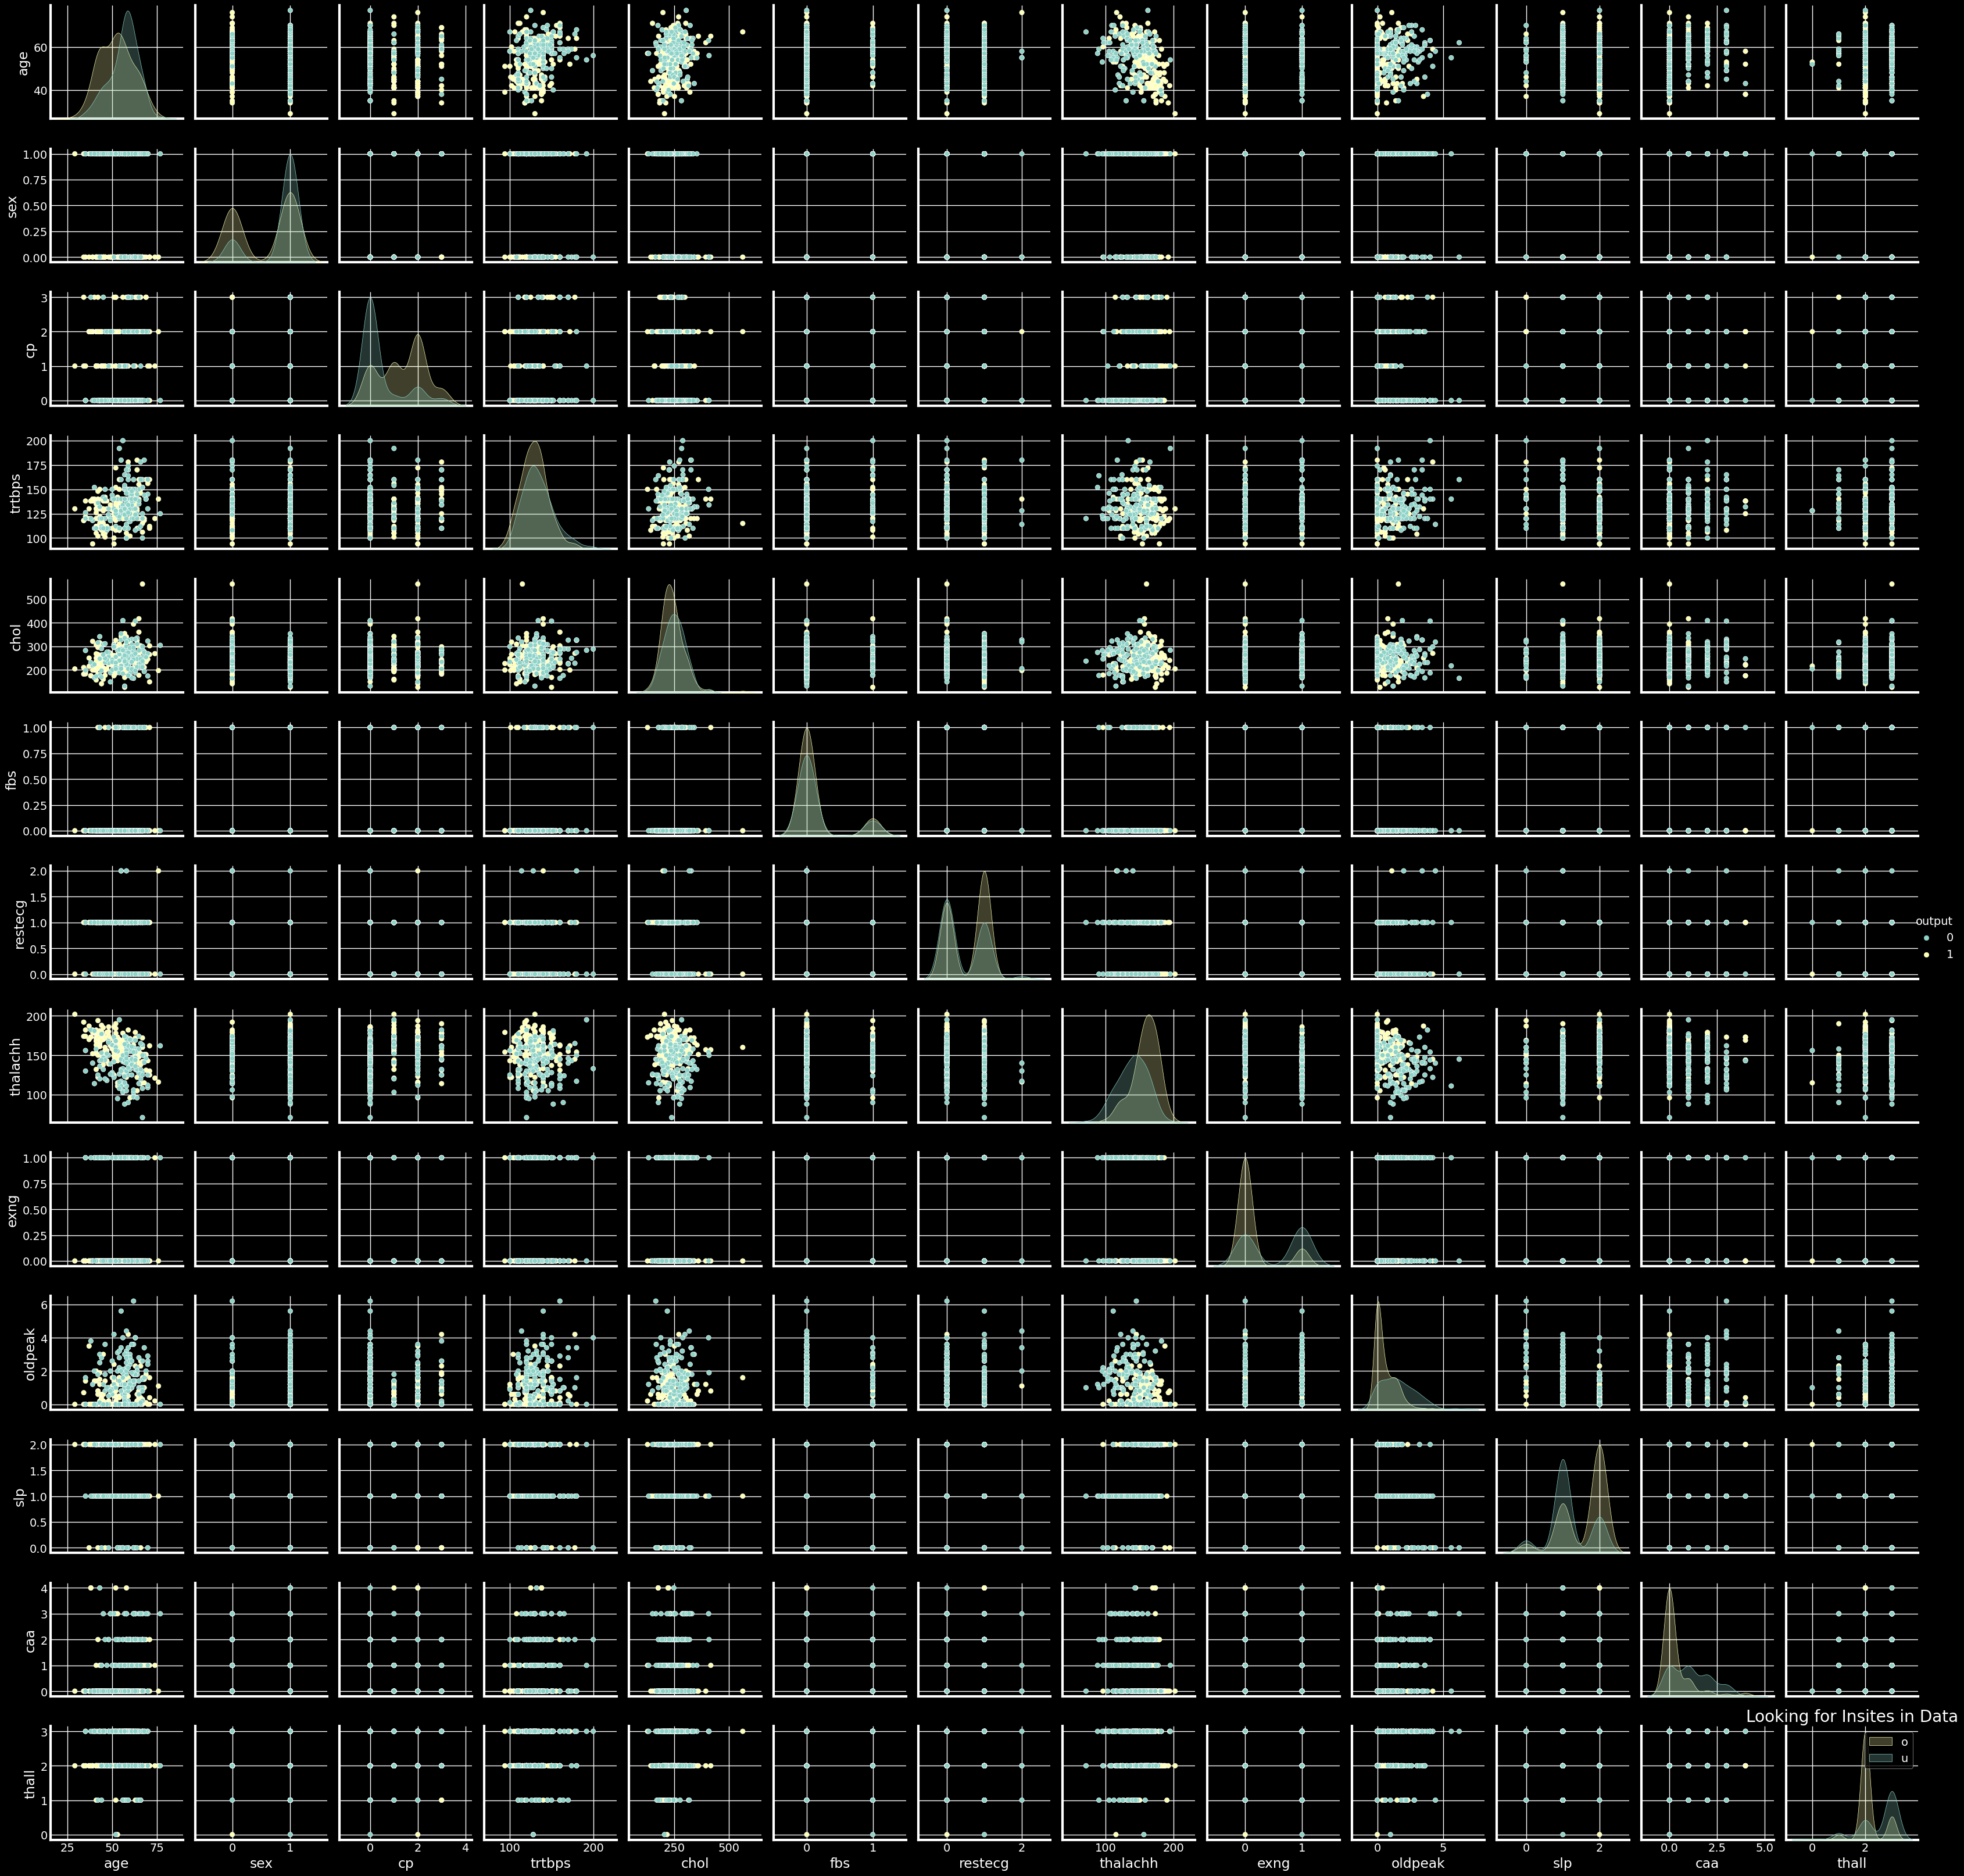

In [ ]:
plt.figure(figsize=(15,10))
sns.pairplot(df,hue="output")
plt.title("Looking for Insites in Data")
plt.legend("output")
plt.tight_layout()
plt.plot()

# Skewness
Sekarang, untuk memeriksa linearitas variabel-variabel tersebut, adalah praktik yang baik untuk membuat grafik distribusi dan melihat skewness (kemiringan) fitur-fiturnya. Kernel density estimate (kde) adalah alat yang cukup berguna untuk menggambar bentuk distribusi.

<Figure size 1500x1000 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Distribution of age Data')

<Axes: title={'center': 'Distribution of age Data'}, xlabel='age', ylabel='Count'>

[]

<Axes: >

Text(0.5, 1.0, 'Distribution of sex Data')

<Axes: title={'center': 'Distribution of sex Data'}, xlabel='sex', ylabel='Count'>

[]

<Axes: >

Text(0.5, 1.0, 'Distribution of cp Data')

<Axes: title={'center': 'Distribution of cp Data'}, xlabel='cp', ylabel='Count'>

[]

<Axes: >

Text(0.5, 1.0, 'Distribution of trtbps Data')

<Axes: title={'center': 'Distribution of trtbps Data'}, xlabel='trtbps', ylabel='Count'>

[]

<Axes: >

Text(0.5, 1.0, 'Distribution of chol Data')

<Axes: title={'center': 'Distribution of chol Data'}, xlabel='chol', ylabel='Count'>

[]

<Axes: >

Text(0.5, 1.0, 'Distribution of fbs Data')

<Axes: title={'center': 'Distribution of fbs Data'}, xlabel='fbs', ylabel='Count'>

[]

<Axes: >

Text(0.5, 1.0, 'Distribution of restecg Data')

<Axes: title={'center': 'Distribution of restecg Data'}, xlabel='restecg', ylabel='Count'>

[]

<Axes: >

Text(0.5, 1.0, 'Distribution of thalachh Data')

<Axes: title={'center': 'Distribution of thalachh Data'}, xlabel='thalachh', ylabel='Count'>

[]

<Axes: >

Text(0.5, 1.0, 'Distribution of exng Data')

<Axes: title={'center': 'Distribution of exng Data'}, xlabel='exng', ylabel='Count'>

[]

<Axes: >

Text(0.5, 1.0, 'Distribution of oldpeak Data')

<Axes: title={'center': 'Distribution of oldpeak Data'}, xlabel='oldpeak', ylabel='Count'>

[]

<Axes: >

Text(0.5, 1.0, 'Distribution of slp Data')

<Axes: title={'center': 'Distribution of slp Data'}, xlabel='slp', ylabel='Count'>

[]

<Axes: >

Text(0.5, 1.0, 'Distribution of caa Data')

<Axes: title={'center': 'Distribution of caa Data'}, xlabel='caa', ylabel='Count'>

[]

ValueError: ignored

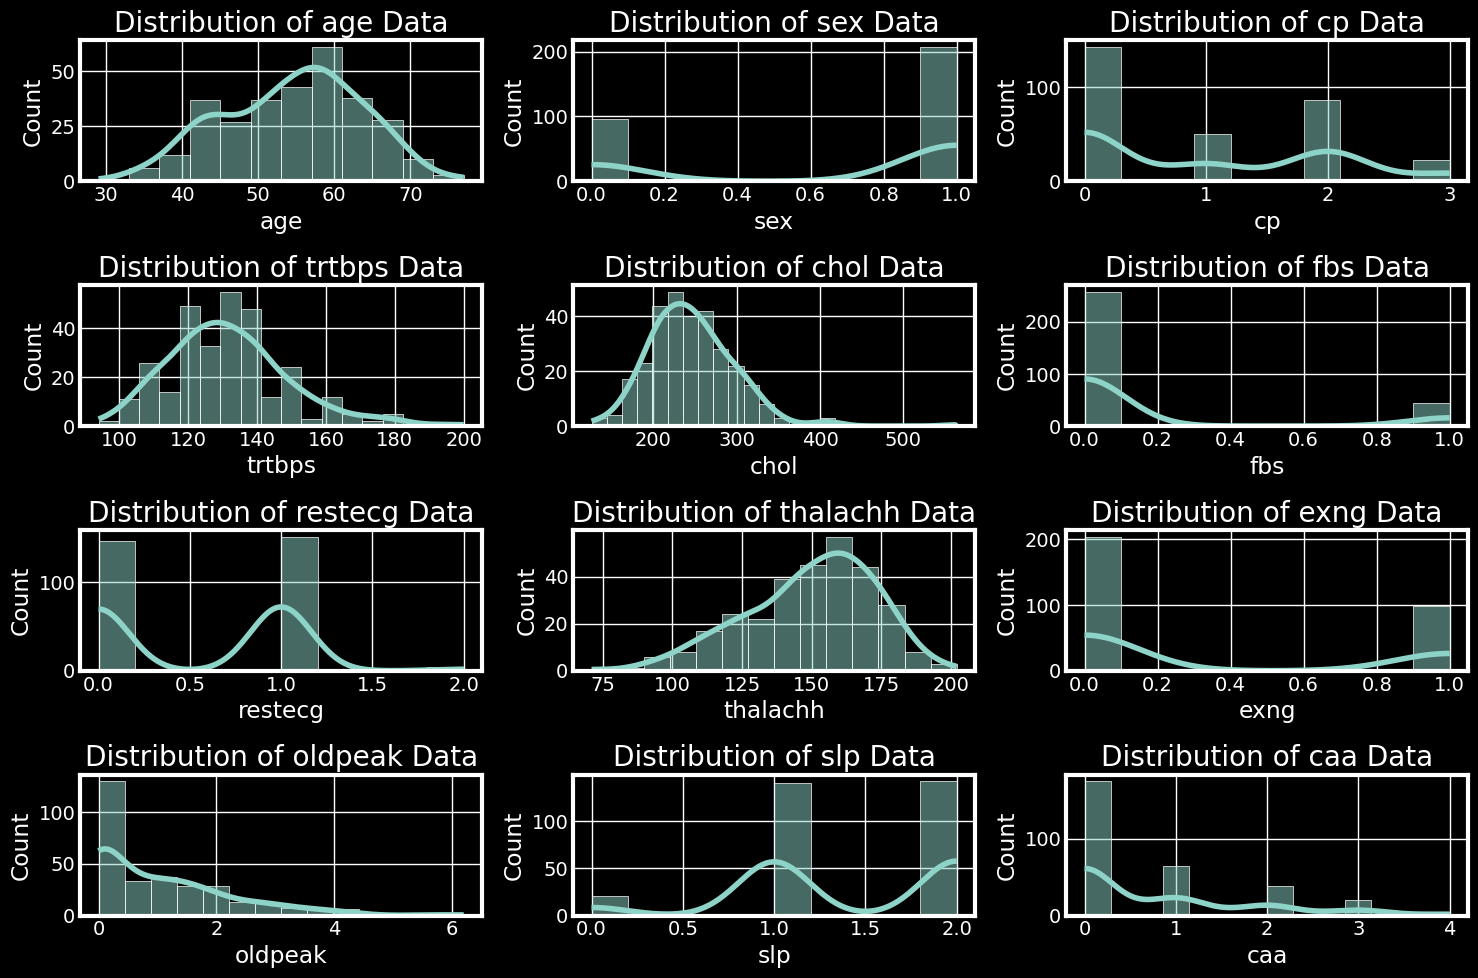

In [ ]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()

In [ ]:
fig = px.box(df,y="age",x="output",title=f"Persebaran Usia")
fig.show()

In [ ]:
fig = px.box(df,y="restecg",x="output",title=f"Persebaran Restecg",color="sex")
fig.show()

In [ ]:
fig = px.box(df,y="chol",x="output",title=f"Persebaran Kolesterol")
fig.show()

In [ ]:
fig = px.box(df,y="oldpeak",x="output",title=f"Distribusi Oldpeak")
fig.show()

In [ ]:
fig = px.box(df,y="thalachh",x="output",title=f"Persebaran detak jantung maksimal yang dicapai ")
fig.show()

# Data Pre Processing


## Handling Null Values

In [ ]:
# mengecek tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# mengecek nilai null di data
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

dari pengecekan tersebut dapat dilihat bahwa tidak ada data yang memiliki nilai null.

## Feature Scalling
Kenapa dibutuhkan feature scalling?
karena beberapa algoritma machine learning sensitif terhadap feature scalling, dan yang lan hampir tidak terpengaruh. Berikut alasan utama mengapa feature scalling penting,

### 1. Algoritma berbasis jarak
Beberapa algoritma machine learning, seperti k-Nearest Neighbors (k-NN) dan Support Vector Machines (SVM), menghitung jarak antara data. Jika skala fitur tidak seragam, variabel dengan nilai yang lebih tinggi akan mendominasi perhitungan jarak dibandingkan variabel dengan nilai yang lebih rendah. Dalam kasus ini, penskalaan fitur membantu menghindari dominasi ini dan memastikan bahwa semua fitur memiliki kontribusi yang seimbang dalam perhitungan jarak.

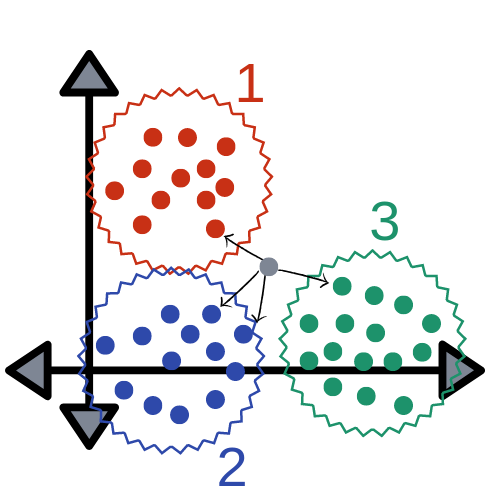

### 2. Algoritma berbasis Tree
Di sisi lain, algoritma berbasis tree cenderung tidak sensitif terhadap feature scalling. Bayangkan, pohon keputusan hanya membagi simpul berdasarkan satu fitur. Pohon keputusan membagi simpul berdasarkan fitur yang meningkatkan homogenitas simpul tersebut. Pembagian pada suatu fitur tidak dipengaruhi oleh fitur lainnya.

Oleh karena itu, tidak ada pengaruh yang signifikan dari fitur-fitur yang tersisa pada pembagian tersebut. Inilah yang membuat algoritma berbasis tree tidak terpengaruh oleh feature scalling.

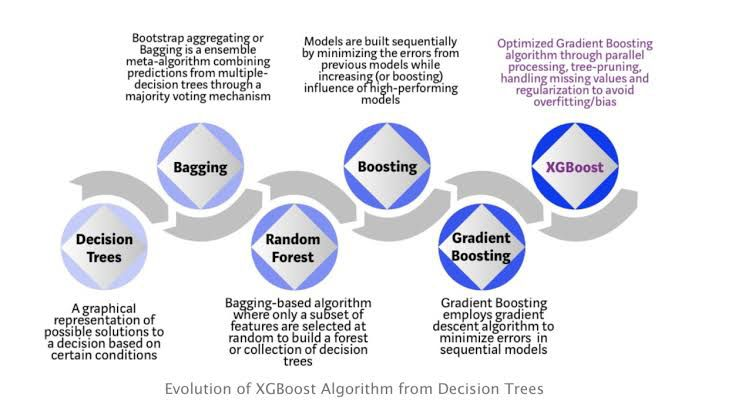

# DATA SPLITTING DAN SCALLING

In [ ]:
#Data Splitting
X=data.iloc[:,:13]
Y=data["output"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=65)

#MinMax Scaling / Normalization of data
MM_scaler = MinMaxScaler()
X_train = MM_scaler.fit_transform(X_train)
X_test = MM_scaler.fit_transform(X_test)

# FUNGSI TAMPILAN UNTUK MEMBUAT PLOT DAN MENGHITUNG DATA

In [ ]:
def compute(Y_pred,Y_test):
    #Output plot
    plt.figure(figsize=(12,6))
    plt.scatter(range(len(Y_pred)),Y_pred,color="yellow",lw=5,label="Predictions")
    plt.scatter(range(len(Y_test)),Y_test,color="red",label="Actual")
    plt.title("Prediction Values vs Real Values")
    plt.legend()
    plt.show()

    cm=confusion_matrix(Y_test,Y_pred)
    class_label = ["High-risk", "Low-risk"]
    df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
    sns.heatmap(df_cm,annot=True,cmap='Pastel1',linewidths=2,fmt='d')
    plt.title("Confusion Matrix",fontsize=15)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    #Calculate Metrics
    acc=accuracy_score(Y_test,Y_pred)
    mse=mean_squared_error(Y_test,Y_pred)
    precision, recall, fscore, train_support = score(Y_test, Y_pred, pos_label=1, average='binary')
    print('Precision: {} \nRecall: {} \nF1-Score: {} \nAccuracy: {} %\nMean Square Error: {}'.format(
        round(precision, 3), round(recall, 3), round(fscore,3), round((acc*100),3), round((mse),3)))

# MODELLING

1. True Positives (TP) - These are the correctly predicted positive values which means that the value of actual class is yes and the value of predicted class is also yes.
2. True Negatives (TN) - These are the correctly predicted negative values which means that the value of actual class is no and value of predicted class is also no.
3. False Positives (FP) – When actual class is no and predicted class is yes.
4. False Negatives (FN) – When actual class is yes but predicted class in no.
5. Accuracy - Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations. Accuracy = TP+TN/TP+FP+FN+TN
6. Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. Precision = TP/TP+FP
7. Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. Recall = TP/TP+FN
8. F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. F1 Score = 2(Recall Precision) / (Recall + Precision)
9. Support - Support is the number of actual occurrences of the class in the specified dataset. Support doesn’t change between models but instead diagnoses the evaluation process

# Training Machine Learning Model

## Non-Tree Based Algorithm
Logistic Regression

Logistic Regression adalah metode perhitungan yang digunakan untuk memprediksi hasil biner: apakah sesuatu terjadi atau tidak. Hal ini dapat ditunjukkan sebagai Ya/Tidak, Lulus/Tidak Lulus, Hidup/Mati, dan sebagainya.

Variabel independen dianalisis untuk menentukan hasil biner dengan hasil yang jatuh ke dalam salah satu dari dua kategori. Variabel independen dapat berupa kategori atau numerik, tetapi variabel dependen selalu bersifat kategorikal. Ditulis seperti ini:

P(Y=1|X) atau P(Y=0|X)

Logistic Regression menghitung probabilitas dari variabel dependen Y, dengan diberikan variabel independen X.

Metode ini dapat digunakan untuk menghitung probabilitas sebuah kata memiliki konotasi positif atau negatif (0, 1, atau dalam skala di antaranya). Atau dapat digunakan untuk menentukan objek yang terdapat dalam sebuah foto (pohon, bunga, rumput, dll.), dengan setiap objek diberikan probabilitas antara 0 dan 1.

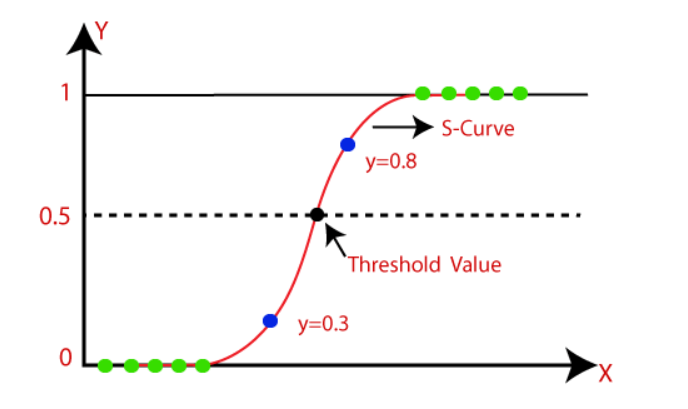

LogisticRegression(random_state=10)

Execution time of model: 0.02294 seconds



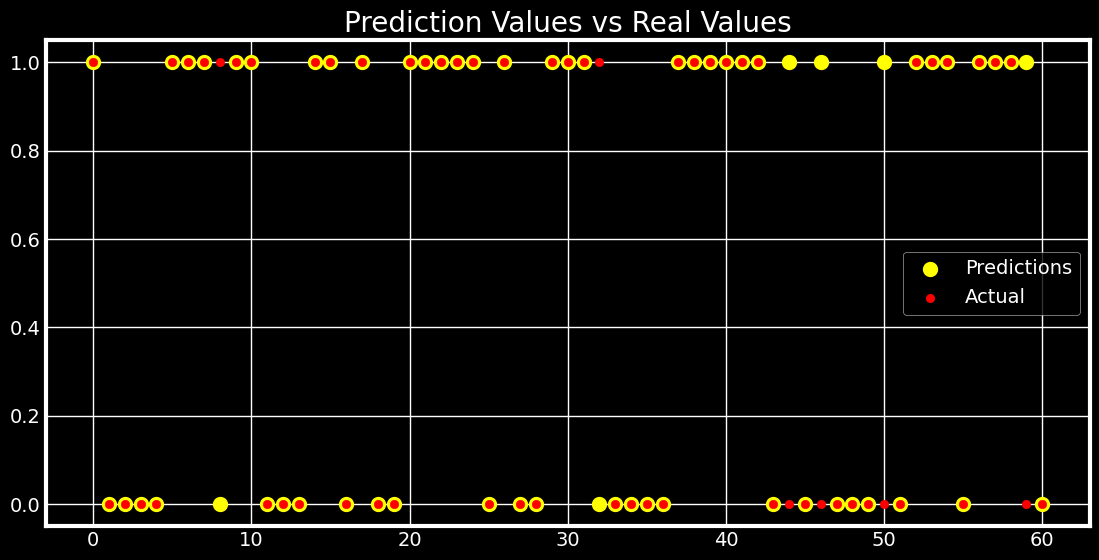

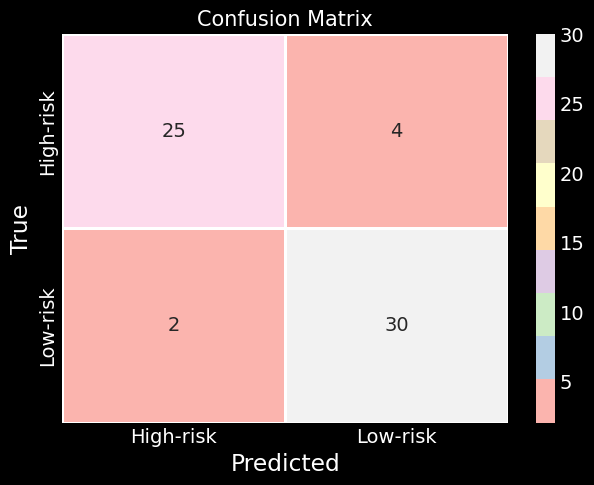

Precision: 0.882 
Recall: 0.938 
F1-Score: 0.909 
Accuracy: 90.164 %
Mean Square Error: 0.098


In [ ]:
#Build Model
start = time.time()

model_Log= LogisticRegression(random_state=10)
model_Log.fit(X_train,Y_train)
Y_pred= model_Log.predict(X_test)

end=time.time()

model_Log_time=end-start
model_Log_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_Log_time),5)} seconds\n")
#Plot and compute metrics
compute(Y_pred,Y_test)

Untuk kasus mendeteksi dan memprediksi kemungkinan serangan jantung, model regresi logistik (logistic regression) lebih cocok daripada model regresi linear. Alasan yang berada dalam pengetahuan kami adalah sebagai berikut:

1. Variabel Target: Dalam kasus ini, kita ingin melakukan klasifikasi, yaitu memprediksi apakah seseorang berisiko mengalami serangan jantung atau tidak. Variabel targetnya bersifat biner atau kategorikal, yaitu berisiko atau tidak berisiko. Model regresi logistik secara khusus dirancang untuk menangani masalah klasifikasi dengan variabel target biner atau kategorikal.

2. Output Probability: Regresi logistik memberikan output dalam bentuk probabilitas. Kita dapat menginterpretasikan probabilitas tersebut sebagai kemungkinan seseorang berisiko mengalami serangan jantung. Dalam kasus ini, kita dapat menentukan ambang batas (threshold) tertentu untuk mengklasifikasikan apakah seseorang berisiko atau tidak berisiko berdasarkan probabilitas yang diperoleh.

3. Interpretasi Koefisien: Koefisien dalam model regresi logistik dapat diinterpretasikan sebagai pengaruh relatif dari setiap fitur pada log-odds serangan jantung. Hal ini memungkinkan kita untuk mengetahui fitur-fitur mana yang memiliki pengaruh yang signifikan terhadap risiko serangan jantung.

4. Evaluasi Model: Terdapat metrik evaluasi yang sesuai untuk model klasifikasi seperti regresi logistik, seperti akurasi, presisi, recall, F1-score, dan area di bawah kurva ROC (AUC-ROC). Metrik-metrik ini memberikan informasi mengenai performa model dalam mengklasifikasikan risiko serangan jantung.

Jadi, berdasarkan sifat dan kebutuhan dari masalah yang ingin kami selesaikan, model regresi logistik lebih sesuai daripada model regresi linear untuk mendeteksi dan memprediksi kemungkinan serangan jantung.

 Regresi linear cocok untuk memprediksi nilai kontinu, sementara regresi logistik cocok untuk tugas klasifikasi dengan hasil kategorikal atau biner.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
import pickle
warnings.filterwarnings("ignore")


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
import pickle
warnings.filterwarnings("ignore")

data = pd.read_csv("https://raw.githubusercontent.com/tarawithoutbudimann/datasets-ygy/main/Heart%20Attack%20Analysis%20%26%20Prediction%20Dataset/heart.csv")

X = data.iloc[:, :-1].values  # Include all columns
y = data.iloc[:, -1].values
y = y.astype('int')
X = X.astype('float')  # Change the data type to float

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

input_str = "63\t1\t3\t145\t233\t1\t0\t150\t0\t2.3\t0\t0\t1"
input_values = [float(x) for x in input_str.split('\t') if x != '']  # Exclude empty values
final = [np.array(input_values)]
b = log_reg.predict_proba(final)

pickle.dump(log_reg, open('model.pkl', 'wb'))
model = pickle.load(open('model.pkl', 'rb'))


LogisticRegression()